In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [3]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")
data.sample(2)

The dataset currently contains 87129 records, here is a sample:


,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index
16493,2020-03-03,US_WI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13.89
8036,2020-01-31,SK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.78


## Choose specific policies dataset (closure and health)

In [4]:
data_closure = data[['date','key','school_closing', 'workplace_closing', 'cancel_public_events','restrictions_on_gatherings','public_transport_closing','stay_at_home_requirements','restrictions_on_internal_movement','international_travel_controls']]
data_health = data[['date','key', 'testing_policy', 'contact_tracing','emergency_investment_in_healthcare','investment_in_vaccines']] 

## Preprocess data like normalizing and averaging data 

In [9]:
data_closure_NZ = data_closure[data_closure['key'] == "NZ"]

s1 = (data_closure_NZ['school_closing'] - data_closure_NZ['school_closing'].min())/(data_closure_NZ['school_closing'].max() - data_closure_NZ['school_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['school_closing'],axis=1)
data_closure_NZ.insert(2,'school_closing',s1)
s2 = (data_closure_NZ['workplace_closing'] - data_closure_NZ['workplace_closing'].min())/(data_closure_NZ['workplace_closing'].max() - data_closure_NZ['workplace_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['workplace_closing'],axis=1)
data_closure_NZ.insert(3,'workplace_closing',s2)
s3 = (data_closure_NZ['cancel_public_events'] - data_closure_NZ['cancel_public_events'].min())/(data_closure_NZ['cancel_public_events'].max() - data_closure_NZ['cancel_public_events'].min())
data_closure_NZ = data_closure_NZ.drop(['cancel_public_events'],axis=1)
data_closure_NZ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_NZ['restrictions_on_gatherings'] - data_closure_NZ['restrictions_on_gatherings'].min())/(data_closure_NZ['restrictions_on_gatherings'].max() - data_closure_NZ['restrictions_on_gatherings'].min())
data_closure_NZ = data_closure_NZ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_NZ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_NZ['public_transport_closing'] - data_closure_NZ['public_transport_closing'].min())/(data_closure_NZ['public_transport_closing'].max() - data_closure_NZ['public_transport_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['public_transport_closing'],axis=1)
data_closure_NZ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_NZ['stay_at_home_requirements'] - data_closure_NZ['stay_at_home_requirements'].min())/(data_closure_NZ['stay_at_home_requirements'].max() - data_closure_NZ['stay_at_home_requirements'].min())
data_closure_NZ = data_closure_NZ.drop(['stay_at_home_requirements'],axis=1)
data_closure_NZ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_NZ['restrictions_on_internal_movement'] - data_closure_NZ['restrictions_on_internal_movement'].min())/(data_closure_NZ['restrictions_on_internal_movement'].max() - data_closure_NZ['restrictions_on_internal_movement'].min())
data_closure_NZ = data_closure_NZ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_NZ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_NZ['international_travel_controls'] - data_closure_NZ['international_travel_controls'].min())/(data_closure_NZ['international_travel_controls'].max() - data_closure_NZ['international_travel_controls'].min())
data_closure_NZ = data_closure_NZ.drop(['international_travel_controls'],axis=1)
data_closure_NZ.insert(9,'international_travel_controls',s8)

NZ_closure_average_ontime = data_closure_NZ.mean(axis = 0) 
NZ_closure_average = NZ_closure_average_ontime.mean()
print(NZ_closure_average)


data_health_NZ = data_health[data_health['key'] == "NZ"]
s1 = (data_health_NZ['testing_policy'] - data_health_NZ['testing_policy'].min())/(data_health_NZ['testing_policy'].max() - data_health_NZ['testing_policy'].min())
data_health_NZ = data_health_NZ.drop(['testing_policy'],axis=1)
data_health_NZ.insert(2,'testing_policy',s1)
s2 = (data_health_NZ['contact_tracing'] - data_health_NZ['contact_tracing'].min())/(data_health_NZ['contact_tracing'].max() - data_health_NZ['contact_tracing'].min())
data_health_NZ = data_health_NZ.drop(['contact_tracing'],axis=1)
data_health_NZ.insert(3,'contact_tracing',s2)
s3 = (data_health_NZ['emergency_investment_in_healthcare'] - data_health_NZ['emergency_investment_in_healthcare'].min())/(data_health_NZ['emergency_investment_in_healthcare'].max() - data_health_NZ['emergency_investment_in_healthcare'].min())
data_health_NZ = data_health_NZ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_NZ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_NZ['investment_in_vaccines'] - data_health_NZ['investment_in_vaccines'].min())/(data_health_NZ['investment_in_vaccines'].max() - data_health_NZ['investment_in_vaccines'].min())
data_health_NZ = data_health_NZ.drop(['investment_in_vaccines'],axis=1)
data_health_NZ.insert(5,'investment_in_vaccines',s4)

NZ_health_average_ontime = data_health_NZ.mean(axis = 0) 
NZ_health_average = NZ_health_average_ontime.mean()
print(NZ_health_average)

0.3179908839038342
0.402614174635803


## Compare the policy index differences between different countries(countries classification is from this website: https://www.endcoronavirus.org/countries)

## Green means best performance, yellow means moderate performance and red means worst performance.

In [30]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y1 = [AU_closure_average,NZ_closure_average,SG_closure_average,TH_closure_average,SO_closure_average,
      CN_closure_average,EG_closure_average,IL_closure_average,KG_closure_average,TJ_closure_average,
      US_closure_average,BR_closure_average,CA_closure_average,PH_closure_average,RU_closure_average]
y2 = [AU_health_average,NZ_health_average,SG_health_average,TH_health_average,SO_health_average,
      CN_health_average,EG_health_average,IL_health_average,KG_health_average,TJ_health_average,
      US_health_average,BR_health_average,CA_health_average,PH_health_average,RU_health_average]

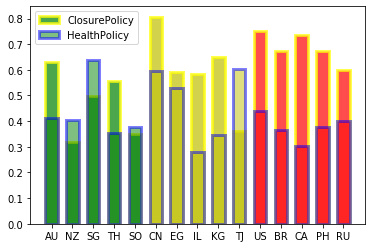

In [31]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

In [34]:
x1 = ["SG","CN","CA"]
y11 = [SG_closure_average,CN_closure_average,CA_closure_average]
y22 = [SG_health_average,CN_health_average,CA_health_average]

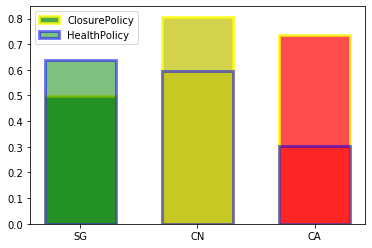

In [35]:
plt.bar(x1, y11, alpha=0.7, width=0.6, color='gyr', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x1, y22, alpha=0.5, width=0.6, color='gyr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

## Also, we compare the results between different countries by their Incident Rate (incident rates are calculated in another code file)
### Top 25 countries:(those have highest incident rate)(red)
Andorra  AD,Montenegro  ME(CS)(missing),Luxembourg  LU,San Marino  SM,Bahrain  BH,Czechia  CZ,Belgium  BE,Qatar  QA,Armenia  AM(missing),USA  US,Slovenia  SI,Panama  PA,Switzerland  CH,Israel  IL,Georgia  GE,Liechtenstein  LI(missing), Spain  ES,Croatia  HR,France  FR,Kuwait  KW,Austria  AT,Netherlands  NL,North Macedonia  MK(missing),Argentina  AR,Portugal  PT,Brazil  BR,Peru  PE,Chile  CL,Moldova  MD.
### Bottom 25 countries:(those have lowest incident rate)(green)
Vietnam  VN,Thailand  TH,Burundi  BI,China  CN,Niger  NE,Papua New Guinea  PG,Yemen  YE,Chad  TD,Democratic Republic of the Congo  CD,Burkina Faso  BF,Eritrea  ER,Mali  ML,Benin  BJ,Mongolia  MN,South Sudan  SS,Somalia  SO,Sierra Leone  SL,Malawi  MW,Liberia  LR,Nigeria  NG,Togo  TG,Mauritius  MU,New Zealand  NZ,Sudan  SD,Rwanda  RW.

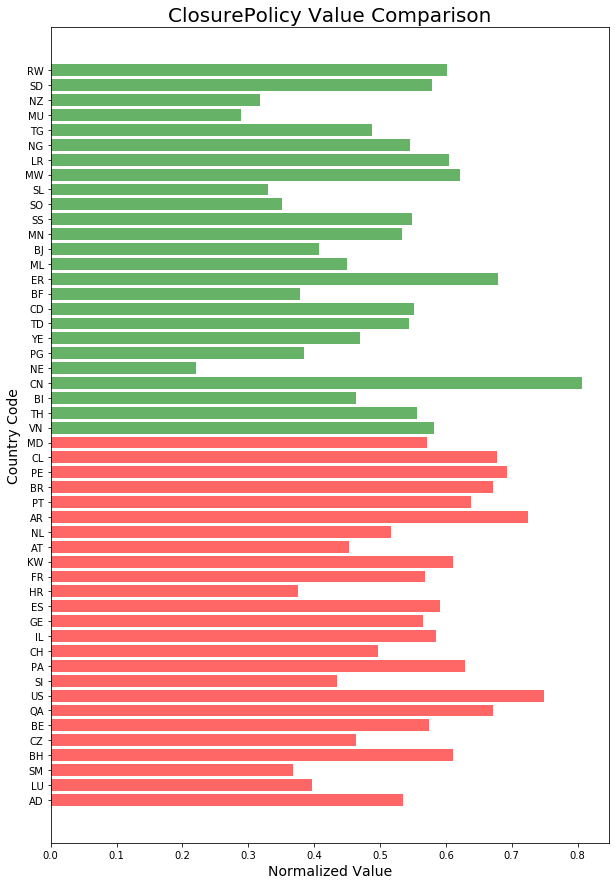

In [45]:
x = ["AD","LU","SM","BH","CZ","BE","QA","US","SI","PA","CH","IL","GE","ES","HR","FR", "KW","AT","NL","AR","PT","BR","PE","CL","MD","VN","TH","BI","CN","NE","PG","YE","TD","CD","BF","ER","ML","BJ","MN","SS","SO","SL","MW","LR","NG","TG","MU", "NZ","SD","RW"]
y1 = [AD_closure_average,LU_closure_average,SM_closure_average,BH_closure_average,CZ_closure_average,BE_closure_average, QA_closure_average,US_closure_average,SI_closure_average,PA_closure_average,CH_closure_average,IL_closure_average, GE_closure_average,ES_closure_average,HR_closure_average,FR_closure_average,KW_closure_average,AT_closure_average, NL_closure_average,AR_closure_average,PT_closure_average,BR_closure_average,PE_closure_average,CL_closure_average, MD_closure_average,VN_closure_average,TH_closure_average,BI_closure_average,CN_closure_average,NE_closure_average, PG_closure_average,YE_closure_average,TD_closure_average,CD_closure_average,BF_closure_average,ER_closure_average, ML_closure_average,BJ_closure_average,MN_closure_average,SS_closure_average,SO_closure_average,SL_closure_average, MW_closure_average,LR_closure_average,NG_closure_average,TG_closure_average,MU_closure_average,NZ_closure_average,SD_closure_average,RW_closure_average]

plt.figure(figsize=(10,15))

plt.title('ClosurePolicy Value Comparison',fontsize=20)
plt.xlabel(u'Normalized Value',fontsize=14)
plt.ylabel(u'Country Code',fontsize=14)
plt.barh(x, y1, alpha=0.6, color='rrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggg')
plt.show()

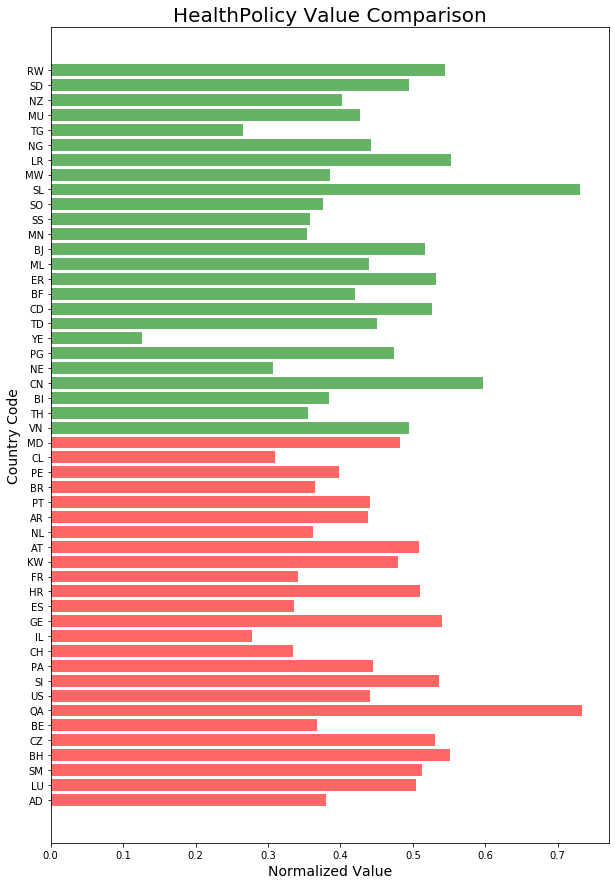

In [47]:
x = ["AD","LU","SM","BH","CZ","BE","QA","US","SI","PA","CH","IL","GE","ES","HR","FR", "KW","AT","NL","AR","PT","BR","PE","CL","MD","VN","TH","BI","CN","NE","PG","YE","TD","CD","BF","ER","ML","BJ","MN","SS","SO","SL","MW","LR","NG","TG","MU", "NZ","SD","RW"]
y2 = [AD_health_average,LU_health_average,SM_health_average,BH_health_average,CZ_health_average,BE_health_average, QA_health_average,US_health_average,SI_health_average,PA_health_average,CH_health_average,IL_health_average, GE_health_average,ES_health_average,HR_health_average,FR_health_average,KW_health_average,AT_health_average, NL_health_average,AR_health_average,PT_health_average,BR_health_average,PE_health_average,CL_health_average, MD_health_average,VN_health_average,TH_health_average,BI_health_average,CN_health_average,NE_health_average, PG_health_average,YE_health_average,TD_health_average,CD_health_average,BF_health_average,ER_health_average, ML_health_average,BJ_health_average,MN_health_average,SS_health_average,SO_health_average,SL_health_average, MW_health_average,LR_health_average,NG_health_average,TG_health_average,MU_health_average,NZ_health_average,SD_health_average,RW_health_average]

plt.figure(figsize=(10,15))

plt.title('HealthPolicy Value Comparison',fontsize=20)
plt.xlabel(u'Normalized Value',fontsize=14)
plt.ylabel(u'Country Code',fontsize=14)
plt.barh(x, y2, alpha=0.6, color='rrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggg')
plt.show()

## My conclusion: There is no obvious correlation between a single policy (e.g. closure policy) and performance towards COVID-19 which means you can't stop the spread of COVID-19 by just obeying the health policy but reopening the workplace unlimitedly. We should try to follow every good policy as much as possible. Those policies' influence are combined.